In [ ]:
from ultralytics import YOLO
import os
from sklearn.model_selection import KFold
import yaml
import shutil
import cv2
import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 24.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/prostate_cancer/YOLO_sech_1.zip

Archive:  /content/drive/MyDrive/prostate_cancer/YOLO_sech_1.zip
   creating: YOLO_sech_1/
  inflating: YOLO_sech_1/conf.yaml   
   creating: YOLO_sech_1/images/
  inflating: YOLO_sech_1/images/0.jpg  
  inflating: YOLO_sech_1/images/1.jpg  
  inflating: YOLO_sech_1/images/10.jpg  
  inflating: YOLO_sech_1/images/11.jpg  
  inflating: YOLO_sech_1/images/12.jpg  
  inflating: YOLO_sech_1/images/13.jpg  
  inflating: YOLO_sech_1/images/14.jpg  
  inflating: YOLO_sech_1/images/15.jpg  
  inflating: YOLO_sech_1/images/16.jpg  
  inflating: YOLO_sech_1/images/17.jpg  
  inflating: YOLO_sech_1/images/18.jpg  
  inflating: YOLO_sech_1/images/19.jpg  
  inflating: YOLO_sech_1/images/2.jpg  
  inflating: YOLO_sech_1/images/20.jpg  
  inflating: YOLO_sech_1/images/21.jpg  
  inflating: YOLO_sech_1/images/22.jpg  
  inflating: YOLO_sech_1/images/23.jpg  
  inflating: YOLO_sech_1/images/24.jpg  
  inflating: YOLO_sech_1/images/25.jpg  
  inflating: YOLO_sech_1/images/26.jpg  
  inflating: YOLO_sec

## Training with folds

In [ ]:
data_config_path = "conf_collab.yaml"

k_folds = 5
epochs = 10
img_size = 1024

with open(data_config_path) as f:
    data_config = yaml.safe_load(f)


dataset_path = data_config['path']

images_path = os.path.join(dataset_path, 'images')
print(images_path)
labels_path = os.path.join(dataset_path, 'labels')


image_files = []
image_files.extend(glob.glob(os.path.join(images_path, '*.jpg')))

label_files = []
label_files.extend(glob.glob(os.path.join(labels_path, '*.txt')))

/content/YOLO_sech_1/images


In [ ]:
print(len(image_files))

68


In [ ]:
with open(fold_config_path, 'w') as f:
        yaml.dump(fold_data_config, f)

    model = YOLO("yolov8n.pt")

    model.train(data=fold_config_path, epochs=epochs, imgsz=img_size)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [ ]:
kf = KFold(n_splits=k_folds, shuffle=True)


for fold, (train_idx, val_idx) in enumerate(kf.split(image_files)):
    print(f'FOLD {fold + 1}/{k_folds}')
    print('--------------------------------')

    train_dir = os.path.join(dataset_path, 'images', f'fold_{fold}_train')
    val_dir = os.path.join(dataset_path, 'images', f'fold_{fold}_val')
    train_labels_dir = os.path.join(dataset_path, 'labels', f'fold_{fold}_train')
    val_labels_dir = os.path.join(dataset_path, 'labels', f'fold_{fold}_val')

    for directory in [train_dir, val_dir, train_labels_dir, val_labels_dir]:
        if os.path.exists(directory):
            shutil.rmtree(directory)

    os.makedirs(train_dir)
    os.makedirs(val_dir)
    os.makedirs(train_labels_dir)
    os.makedirs(val_labels_dir)

    for idx in train_idx:
        shutil.copy(image_files[idx], train_dir)
        label_file = os.path.splitext(os.path.basename(image_files[idx]))[0] + '.txt'
        shutil.copy(os.path.join(labels_path, label_file), train_labels_dir)

    for idx in val_idx:
        shutil.copy(image_files[idx], val_dir)
        label_file = os.path.splitext(os.path.basename(image_files[idx]))[0] + '.txt'
        shutil.copy(os.path.join(labels_path, label_file), val_labels_dir)

    fold_config_path = os.path.join(dataset_path, f'fold_{fold}_config.yaml')
    fold_data_config = data_config.copy()
    fold_data_config['train'] = train_dir
    fold_data_config['val'] = val_dir

    with open(fold_config_path, 'w') as f:
        yaml.dump(fold_data_config, f)


    model = YOLO("yolov8n.pt")

    model.train(data=fold_config_path, epochs=epochs, imgsz=img_size)

    model.save(f'yolo_model_fold_{fold}.pt')

print('K-Fold Cross Validation Completed')

FOLD 1/5
--------------------------------
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/YOLO_sech_1/fold_0_config.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

train: Scanning /content/YOLO_sech_1/labels/fold_0_train... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 1660.16it/s]

train: New cache created: /content/YOLO_sech_1/labels/fold_0_train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/YOLO_sech_1/labels/fold_0_val... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 568.92it/s]

val: New cache created: /content/YOLO_sech_1/labels/fold_0_val.cache


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


KeyboardInterrupt: 

## Just training

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
model.train(data="conf_collab_aug.yaml", epochs=100, imgsz=1024)

metrics = model.val()

print(metrics.box.map)
print(metrics.box.map50)
print(metrics.box.map75)
print(metrics.box.maps)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=conf_collab_aug.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning /content/YOLO_sech_1/train/labels.cache... 64 images, 10 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/YOLO_sech_1/val/labels.cache... 16 images, 2 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.47G      2.749      9.621      2.397         26       1024: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         16         15   0.000208     0.0667   0.000111   3.34e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.17G      2.654      8.448      2.438         23       1024: 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         16         15   0.000208     0.0667   0.000111   3.34e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.17G      2.529      7.801       2.25         28       1024: 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         16         15   0.000417      0.133   0.000472   9.45e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.17G      2.005      6.226      1.932         17       1024: 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         16         15    0.00187        0.6      0.015     0.0059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.17G      1.959      5.603      1.846         27       1024: 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         16         15    0.00167      0.533    0.00732     0.0037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.17G      1.858      5.311      1.764         28       1024: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         16         15    0.00187        0.6     0.0271    0.00672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.17G      1.682      5.376      1.603         26       1024: 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         16         15    0.00104      0.333     0.0284    0.00647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.17G      1.746      5.334      1.656         28       1024: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         16         15    0.00146      0.467     0.0758     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.17G      1.699      4.688      1.602         23       1024: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         16         15    0.00125        0.4    0.00217   0.000702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.17G      1.878      5.315      1.761         27       1024: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         16         15    0.00167      0.533    0.00882    0.00203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.17G      1.665      4.746      1.584         25       1024: 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         16         15    0.00187        0.6    0.00667    0.00317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.17G      1.495       4.48      1.506         32       1024: 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         16         15       0.72     0.0667     0.0726      0.054



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.17G      1.724      4.365      1.661         23       1024: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         16         15    0.00208      0.667    0.00324   0.000756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.17G      1.676      4.112      1.587         30       1024: 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         16         15    0.00229      0.733    0.00583    0.00128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.17G      1.583      4.323      1.505         17       1024: 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         16         15    0.00125        0.4    0.00723    0.00249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.17G      1.433      3.592      1.386         35       1024: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         16         15     0.0449      0.133     0.0179    0.00325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.17G      1.479      4.151      1.476         21       1024: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         16         15      0.169     0.0667     0.0216    0.00832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.17G      1.473      3.814      1.512         19       1024: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         16         15     0.0164      0.133    0.00744    0.00373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.17G      1.533      3.333      1.546         33       1024: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         16         15    0.00942      0.267    0.00706    0.00233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.17G      1.477        4.1      1.455         24       1024: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         16         15      0.211      0.109     0.0367    0.00978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.17G      1.459      3.779      1.422         20       1024: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         16         15      0.174      0.133      0.108     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.17G       1.58      3.569      1.402         22       1024: 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         16         15      0.295        0.2      0.121     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.17G      1.506      3.777      1.405         29       1024: 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         16         15       0.32     0.0667     0.0527     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.17G      1.435      3.862      1.422         20       1024: 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         16         15      0.143        0.2     0.0735     0.0455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.17G      1.393      3.554      1.367         26       1024: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         16         15      0.166      0.133      0.117      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.17G      1.424      3.459      1.448         20       1024: 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         16         15      0.066      0.333      0.071     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.17G      1.502      3.348      1.479         21       1024: 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         16         15      0.733      0.133      0.175      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.17G      1.474      3.103      1.397         33       1024: 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         16         15       0.64        0.2      0.225       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.17G      1.455       3.06      1.414         33       1024: 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         16         15      0.523      0.333      0.323      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.17G      1.449      3.297      1.507         24       1024: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         16         15      0.287      0.467      0.302      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.17G      1.431      2.976      1.413         21       1024: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         16         15      0.413      0.467      0.327      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.17G      1.393      3.176      1.372         26       1024: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         16         15      0.496        0.4      0.328      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.17G      1.359      2.804      1.373         23       1024: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         16         15      0.626      0.267      0.325      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.17G      1.292      2.582      1.282         24       1024: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         16         15        0.5      0.333      0.372      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.17G      1.276      2.441      1.307         23       1024: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         16         15      0.261      0.533      0.325      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.17G      1.347      2.419      1.328         25       1024: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         16         15      0.659        0.4      0.361      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.17G      1.393      2.583      1.357         25       1024: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         16         15       0.34        0.4      0.301      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.17G      1.341      2.776      1.327         21       1024: 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         16         15      0.378      0.267      0.319       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.17G      1.363      2.845      1.334         25       1024: 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         16         15      0.272      0.267      0.217     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.17G      1.207       2.56      1.266         22       1024: 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         16         15       0.66        0.2      0.307      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.17G      1.248      2.411      1.271         29       1024: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         16         15      0.378      0.333      0.292      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.17G      1.242      2.207      1.293         27       1024: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         16         15      0.872        0.2      0.296       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.17G      1.143      2.248      1.175         15       1024: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         16         15      0.485      0.333      0.356      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.17G      1.142      1.969      1.203         25       1024: 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         16         15      0.917      0.333      0.395      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.17G      1.116      1.982      1.177         21       1024: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         16         15      0.933      0.333      0.387       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.17G      1.171      2.005       1.22         25       1024: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         16         15      0.572      0.333      0.315      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.17G       1.22      2.157       1.29         26       1024: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         16         15      0.239        0.4      0.267      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.17G      1.099      2.039      1.186         27       1024: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


                   all         16         15      0.381      0.267      0.239      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.17G      1.197      2.023      1.196         21       1024: 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         16         15      0.299      0.467      0.223      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.17G      1.184      2.009      1.256         24       1024: 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         16         15      0.405      0.467      0.322      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.17G      1.305       2.27      1.371         21       1024: 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         16         15      0.648      0.333      0.376      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.17G      1.184      2.024      1.272         28       1024: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         16         15      0.865      0.333      0.414      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.17G      1.122      1.793      1.212         28       1024: 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         16         15      0.689      0.333      0.399      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.17G      1.041      1.829      1.135         23       1024: 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         16         15      0.632        0.4      0.377      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.17G       1.06      1.787      1.141         21       1024: 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         16         15       0.74        0.4      0.418      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.17G      1.005      1.701      1.146         20       1024: 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         16         15      0.558        0.4      0.413      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.17G      1.069      1.713       1.14         20       1024: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         16         15      0.533        0.4        0.4      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.17G      1.077      1.776      1.142         23       1024: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         16         15      0.679        0.4      0.407       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.17G      1.103      1.682      1.171         24       1024: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         16         15      0.532      0.467      0.377      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.17G      0.964       1.51      1.097         19       1024: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         16         15      0.444        0.4      0.382      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.17G     0.9578      1.604       1.11         28       1024: 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         16         15      0.662      0.522      0.439       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.17G      1.003      1.579        1.1         18       1024: 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         16         15      0.916        0.4      0.488      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.17G      1.037      1.796      1.182         22       1024: 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         16         15      0.713        0.4      0.459      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.17G     0.9728      1.526      1.111         26       1024: 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         16         15      0.518      0.467      0.458      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.17G     0.9658      1.495      1.108         26       1024: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         16         15      0.562      0.333      0.454      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.17G     0.9541      1.368      1.086         23       1024: 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         16         15      0.809      0.333      0.446      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.17G     0.9748      1.425      1.156         22       1024: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         16         15      0.953      0.333      0.446      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.17G      0.929      1.349      1.069         23       1024: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         16         15      0.964      0.333      0.461      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.17G      0.887      1.387      1.039         17       1024: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         16         15       0.94      0.333      0.501      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.17G      0.928       1.45      1.076         18       1024: 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         16         15      0.856      0.397      0.508      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.17G     0.8974      1.331      1.082         25       1024: 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         16         15      0.854       0.39      0.521      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.17G     0.8934      1.279      1.074         27       1024: 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         16         15      0.595      0.467      0.489      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.17G     0.8288      1.263      1.045         27       1024: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         16         15      0.578      0.467      0.492      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.17G     0.8393      1.211      1.024         29       1024: 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         16         15      0.803      0.333      0.445      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.17G     0.7929      1.218      1.023         21       1024: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         16         15      0.922      0.333       0.47       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.17G     0.7913      1.239      1.005         24       1024: 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         16         15      0.803      0.333      0.467      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.17G     0.8292      1.123          1         27       1024: 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         16         15      0.561      0.427      0.452      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.17G     0.8666        1.2      1.019         27       1024: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         16         15      0.616      0.467      0.461      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.17G     0.7878      1.109     0.9822         25       1024: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         16         15      0.594      0.467      0.466      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.17G      0.809      1.227      1.024         18       1024: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         16         15      0.534      0.467      0.472      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.17G     0.7436        1.1      1.031         22       1024: 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         16         15      0.574      0.467      0.464      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.17G     0.8524       1.18      1.049         17       1024: 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         16         15      0.778        0.4      0.459       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.17G     0.7232      1.096      1.016         34       1024: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         16         15       0.81      0.467      0.463      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.17G     0.7899      1.219      1.043         20       1024: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         16         15      0.916      0.467      0.476      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.17G     0.7025      1.088     0.9557         24       1024: 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         16         15      0.784      0.467      0.487      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.17G     0.7112      1.024     0.9721         30       1024: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         16         15          1      0.391      0.489      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.17G     0.6926      1.011     0.9862         19       1024: 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         16         15      0.551      0.467      0.483      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.17G     0.6501      1.043     0.9639         24       1024: 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         16         15      0.595      0.533      0.486      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.17G     0.7393      1.103     0.9834         18       1024: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         16         15      0.604       0.51      0.495      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.17G     0.6802      1.056     0.9572         19       1024: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         16         15       0.67      0.407      0.501      0.235


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.17G     0.7568       1.26      1.003         14       1024: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         16         15      0.824        0.4      0.506      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.17G     0.6488      1.187     0.9244         12       1024: 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         16         15          1      0.398      0.512      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.17G     0.6525      1.203     0.9202         11       1024: 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         16         15      0.979        0.4      0.519      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.17G     0.6325      1.153     0.9285         14       1024: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         16         15      0.975        0.4      0.516      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.17G     0.5593      1.101     0.9123         14       1024: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         16         15       0.98        0.4      0.522      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.17G      0.601      1.221     0.8651         15       1024: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         16         15          1      0.333      0.487      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.17G     0.6097      1.109     0.9128         14       1024: 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         16         15      0.804        0.4      0.501       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.17G     0.6031      1.123     0.9008         13       1024: 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         16         15      0.819        0.4      0.491      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.17G     0.5859      1.083     0.8772         17       1024: 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         16         15      0.824        0.4       0.49      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.17G     0.5741      1.118     0.9102         15       1024: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         16         15      0.827        0.4      0.492      0.235



100 epochs completed in 0.127 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.3MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]


                   all         16         15          1      0.333      0.487      0.255
Speed: 0.5ms preprocess, 4.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train4
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/YOLO_sech_1/val/labels.cache... 16 images, 2 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                   all         16         15          1      0.333      0.487      0.257
Speed: 0.5ms preprocess, 9.6ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train42
0.2565677758457197
0.48699333380722054
0.14321709852700806
[    0.25657]


In [ ]:
img_name = 'img1.jpg'
img = cv2.imread(img_name)

In [ ]:
results = model.predict(img_name)
results


image 1/1 /content/img1.jpg: 768x1024 1 cancer, 11.8ms
Speed: 9.4ms preprocess, 11.8ms inference, 2.1ms postprocess per image at shape (1, 3, 768, 1024)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cancer'}
 obb: None
 orig_img: array([[[ 89,  72,  59],
         [ 89,  72,  59],
         [ 89,  72,  59],
         ...,
         [ 89,  72,  59],
         [ 89,  72,  59],
         [ 89,  72,  59]],
 
        [[ 85,  68,  55],
         [ 85,  68,  55],
         [ 85,  68,  55],
         ...,
         [ 85,  68,  55],
         [ 85,  68,  55],
         [ 85,  68,  55]],
 
        [[ 82,  65,  52],
         [ 82,  65,  52],
         [ 82,  65,  52],
         ...,
         [ 82,  65,  52],
         [ 82,  65,  52],
         [ 82,  65,  52]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [ 50,  50,  50],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  1,   1,   1],
         [ 79, 192,   0],
         ...,
         [  0,   0

## Segment anything initial masks

In [ ]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'


In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-4oplwjdv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-4oplwjdv
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=5bc211d84108c100eb024bdde4b9440b6984b914466ea4c5b19e71e6288c4fbb
  Stored in directory: /tmp/pip-ephem-wheel-cache-pizsoc_9/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [ ]:
from segment_anything import sam_model_registry, SamPredictor
import numpy as np
import cv2
import matplotlib.pyplot as plt

model_type = "vit_b"  # "vit_b" или "vit_l" для других вариантов
sam_checkpoint = "sam_vit_b_01ec64.pth"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

image_path = "img1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

predictor.set_image(image)

image_embedding = predictor.get_image_embedding()

print("Image Embedding Shape:", image_embedding.shape)


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


(873, 1164, 3)
Image Embedding Shape: torch.Size([1, 256, 64, 64])


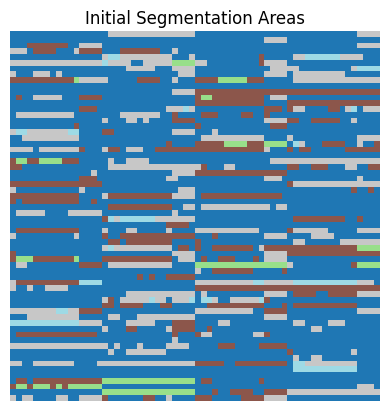

In [ ]:
from sklearn.cluster import KMeans
import torch

embedding_flat = image_embedding.cpu().detach().numpy().reshape(-1, image_embedding.shape[1])  # (N, C)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embedding_flat)
labels = kmeans.labels_.reshape(image_embedding.shape[2], image_embedding.shape[3])  # (H/16, W/16)

plt.imshow(labels, cmap='tab20')
plt.title("Initial Segmentation Areas")
plt.axis("off")
plt.show()


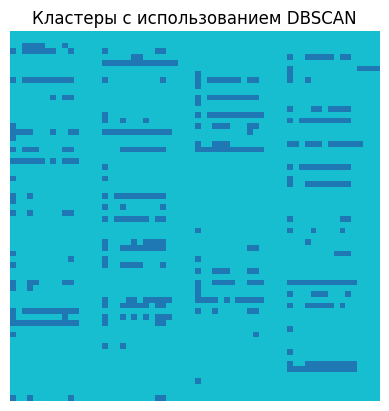

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10, metric='euclidean')  # eps влияет на размер кластеров
labels = dbscan.fit_predict(embedding_flat)

labels_image = labels.reshape(64, 64)

plt.imshow(labels_image, cmap='tab10')
plt.title("Кластеры с использованием DBSCAN")
plt.axis("off")
plt.show()
